##### `GFTI Colleges Opening/Closing Ranks EDA`

#### Steps in EDA
	1. Data Ingestion
	2. Perform basic data quality checks
		Missing Value treatment
	3. Perform descriptive statistics
	4. Data Visualization
		Univariate - Single column visualization
			categorical features - Countplot
			continuous features - histogram
		Bivariate - two columns
			continuous vs continuous -> scatterplot, regplot
			categorical vs con -> boxplot
			categorical vs categorical -> crosstab heatmap
		Multivariate - multiple columns
			correlation plot
			pairplot

Duplicates does not exist
Nulls does not exist
Missing values replaced
Academic Program Short Name
Computer Science and Engineering                 17
Agricultural Engineering                         16
Electronics and Communication Engineering        15
Artificial Intelligence and Machine Learning     14
Chemical Engineering                             11
Bio Technology                                   11
Architecture                                      9
Civil Engineering                                 7
Name: count, dtype: int64


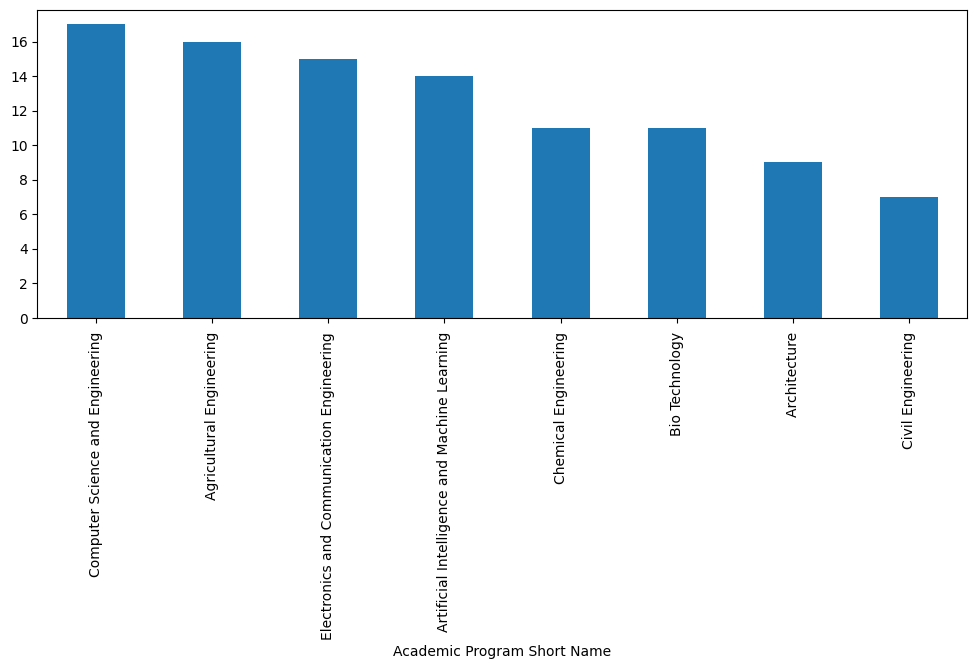

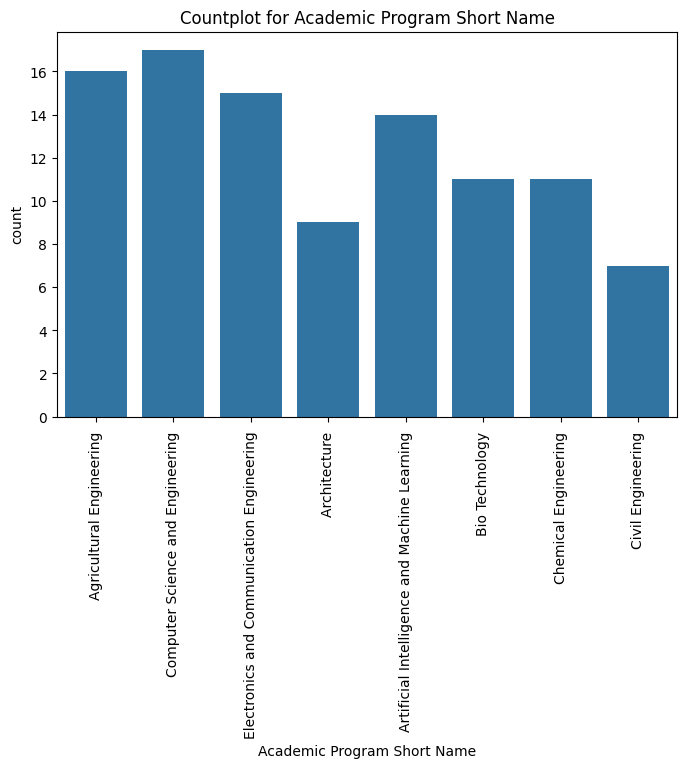

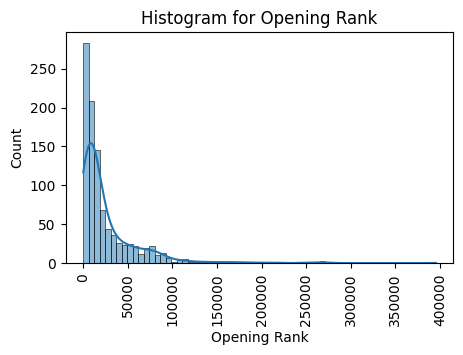

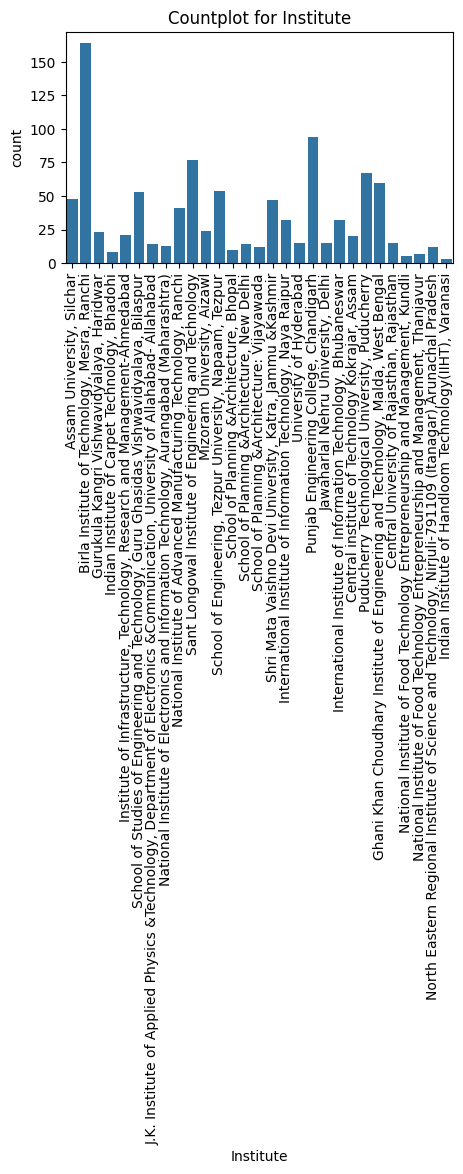

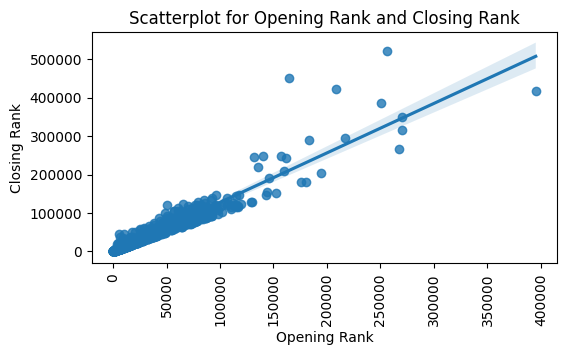

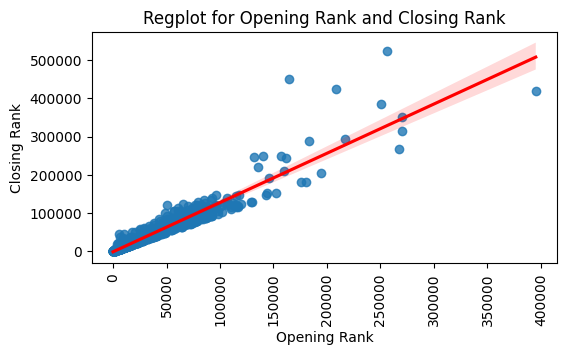

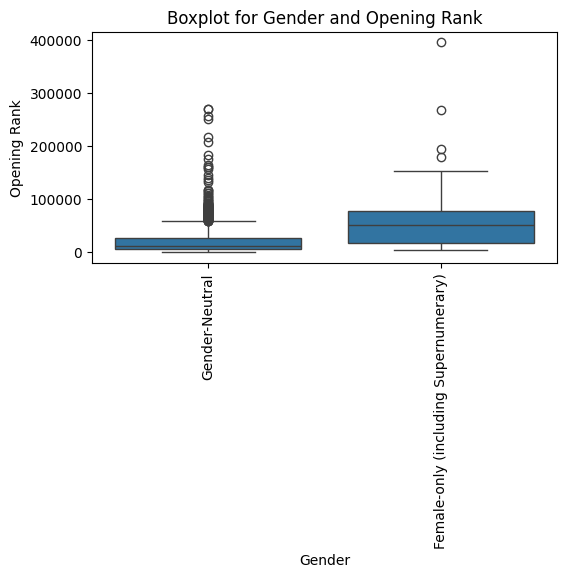

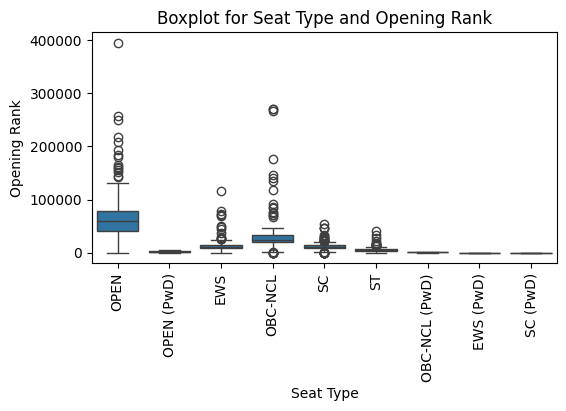

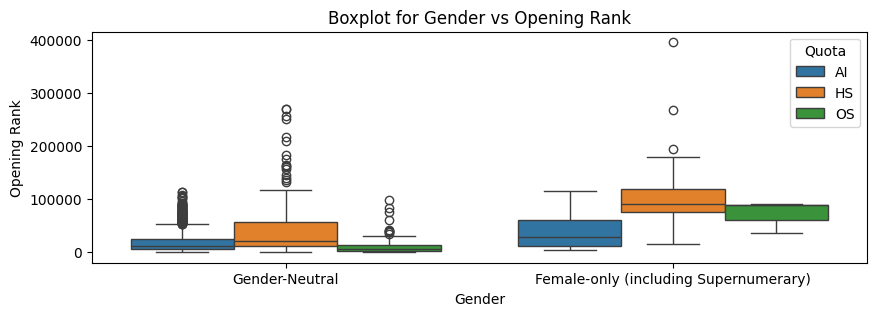

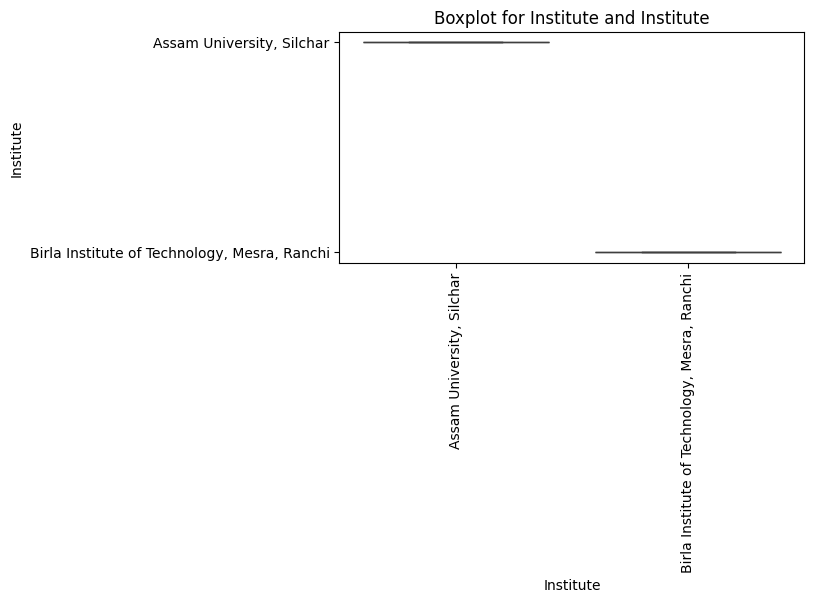

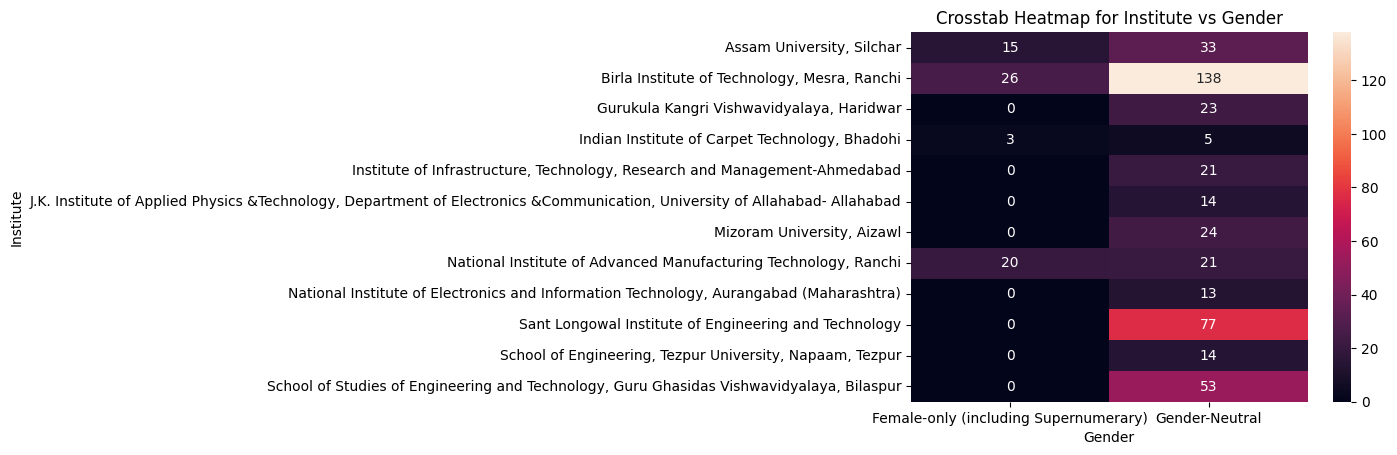

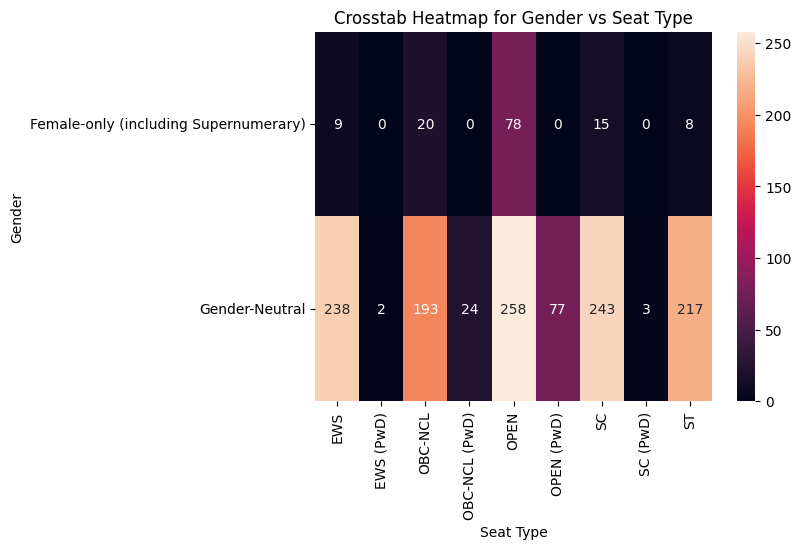

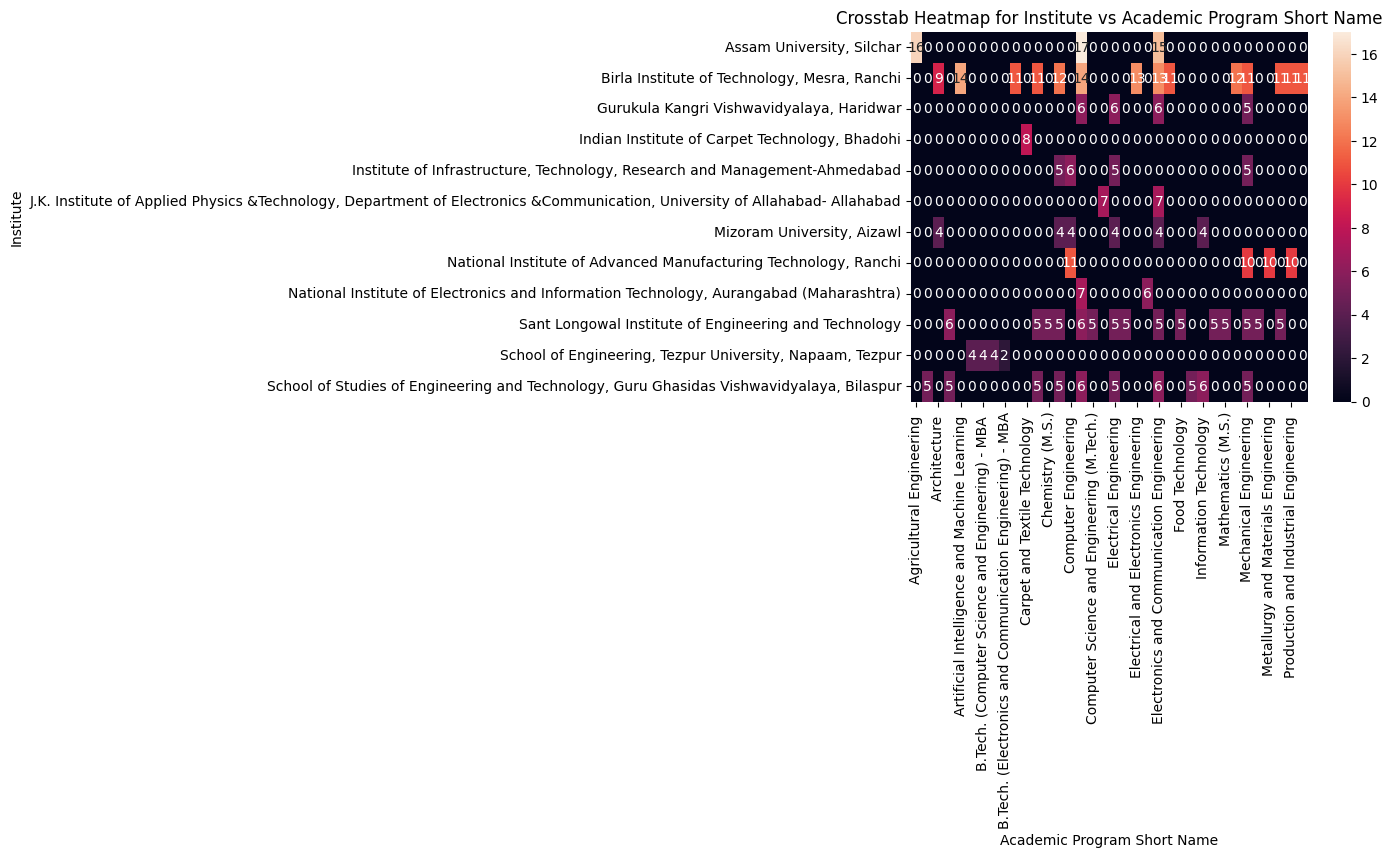

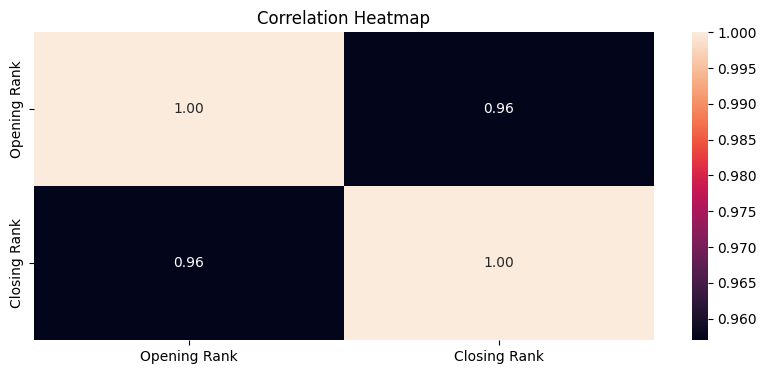

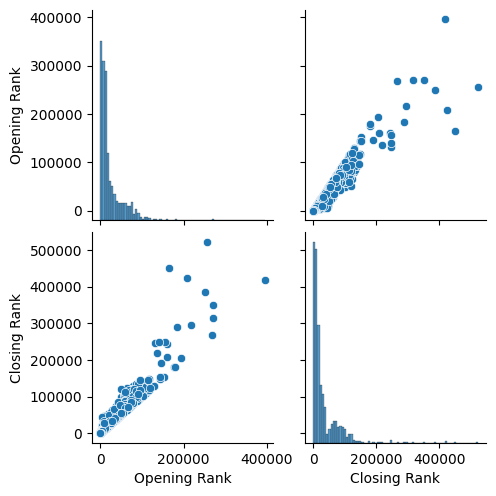

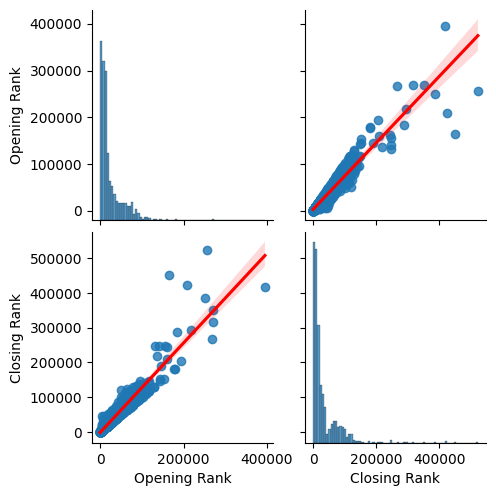

In [87]:
# Step-1: Data Ingestion
import pandas as pd

df = pd.read_csv('gfti-colleges-open-close-ranks-2025.csv')

# Step-2: Data Sanity - Check for duplicates, null
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print("Duplicates Exist.")
    df.drop_duplicates(keep='first').reset_index(drop=True)
    print('Duplicates Removed.')
else:
    print('Duplicates does not exist')

nulls = df.isna().sum()
nulls_cnt = nulls[nulls > 0].sum()
if nulls_cnt > 0:
    print("Nulls does not exist")
else:
    print('Nulls does not exist')

cat = list(df.columns[df.dtypes == "object"])
cat
con = list(df.columns[df.dtypes != "object"])
con

def replacer(df: pd.DataFrame):
    cat = list(df.columns[df.dtypes == "object"])    
    for col in df.columns:        
        if col in cat:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
        else:
            mean = df[col].mean()
            df[col] = df[col].fillna(mean)
    print("Missing values replaced")

replacer(df)

# Step-3: Perform descriptive statistics
cat, con

df[con].describe().T.round(2)
df[cat].describe().T
print(df['Academic Program Short Name'].head(100).value_counts())
df['Academic Program Short Name'].head(100).value_counts().plot(kind='bar', figsize=(12,4))

df['Seat Type'].value_counts()
df['Gender'].value_counts()
df['Institute'].head(3).value_counts()

# Step-4: Data Visualization
    # 1.Univariate - Single column visulization
    # 2.Bivariate - two column
    # 3.Multivariate - multiple columns
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis
    # 1. categorical features - Countplot
    # 2. continuous features - histogram

plt.figure(figsize=(8, 5)) # Set figure size (width, height)
sns.countplot(data=df.head(100), x="Academic Program Short Name") # Plot Graph
plt.title("Countplot for Academic Program Short Name") # Add Title
plt.xticks(rotation=90)
plt.show()

# Univariate Functions
def plot_count(df: pd.DataFrame, col: str):
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot for {col}')
    plt.xticks(rotation=90)
    plt.show()

def plot_histogram(df: pd.DataFrame, col: str):
    plt.figure(figsize=(5,3))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram for {col}')
    plt.xticks(rotation=90)
    plt.show()

for col in con:
    plot_histogram(df.head(1000), col)
    break # Just breaking for one column

for col in cat:
    plot_count(df.head(1000), col)
    break # Just breaking for one column

# Bivariate Analysis
    # Analyze two variables at a time
        # 1.continuous vs continuous -> scatterplot, regplot
        # 2.categorical vs continuous -> boxplot
        # 3.categorical vs categorical -> crosstab heatmap

# Bivariate functions
def plot_scatter(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.regplot(data=df,x=x,y=y)
    plt.title(f"Scatterplot for {x} and {y}")
    plt.xticks(rotation=90)
    plt.show()

def plot_reg(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.regplot(data=df, x=x, y=y, line_kws={"color":"Red"})
    plt.title(f"Regplot for {x} and {y}")
    plt.xticks(rotation=90)
    plt.show()

def plot_box(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f"Boxplot for {x} and {y}")
    plt.xticks(rotation=90)
    plt.show()

con, cat

# 1.continuous vs continuous -> scatterplot, regplot
plot_scatter(df, 'Opening Rank', 'Closing Rank')
plot_reg(df, 'Opening Rank', 'Closing Rank')

# 2. categorical vs continuous -> boxplot
plot_box(df, 'Gender', 'Opening Rank')
plot_box(df, 'Seat Type', 'Opening Rank')

plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x="Gender", y="Opening Rank", hue="Quota")
plt.title("Boxplot for Gender vs Opening Rank")
plt.show()

unique = df[cat].nunique()
unique

for col in cat:
    plot_box(df.head(100), col, 'Institute')
    break

# 3. categorical vs categoric > Crosstab heatmap

def crosstab_heatmap(df: pd.DataFrame, cat_col1: str, cat_col2: str):
    ctab = pd.crosstab(df[cat_col1], df[cat_col2])
    sns.heatmap(ctab, annot=True, fmt="d")
    plt.title(f"Crosstab Heatmap for {cat_col1} vs {cat_col2}")
    plt.show()

crosstab_heatmap(df.head(500), 'Institute', 'Gender',)
crosstab_heatmap(df, 'Gender', 'Seat Type')
crosstab_heatmap(df.head(500), 'Institute', 'Academic Program Short Name',)

# Multivariate analysis
    # 1.correlation plot
    # 2.pairplot

corr = df.corr(numeric_only=True)
corr
corr.loc["Opening Rank", "Closing Rank"]

plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pair Plot
sns.pairplot(df[con])
sns.pairplot(df[con], kind="reg", plot_kws = {"line_kws": {"color": "red"}})

##### `Questions`

##### Get Range of Ranks for 
    Quota: Open State(OS) and All India Category(AI) 
    Academic Program Name: All Engineering Branches
    Seat Type: OPEN
    Gender: Gender-Neutral

In [ ]:
df = pd.read_csv('gfti-colleges-open-close-ranks-2025.csv')
nit_ranks_for_general_category = (
    df.query('`Seat Type` == "OPEN" and `Gender` == "Gender-Neutral" and `Quota` in ["AI", "OS"] ')
)
nit_open_rank = int(nit_ranks_for_general_category['Opening Rank'].min())
nit_close_rank = int(nit_ranks_for_general_category['Closing Rank'].max())

print("GFTI Colleges [ Min Opening Rank:", nit_open_rank, '| Max Closing Rank:', nit_close_rank,"]")

##### Get Range of Ranks for 
    Quota: Home State(HS) 
    Academic Program Name: All Engineering Branches
    Seat Type: OPEN
    Gender: Gender-Neutral

In [ ]:
nit_ranks_for_home_state_general_category = (
    df.query('`Seat Type` == "OPEN" and `Gender` == "Gender-Neutral" and `Quota` in ["HS"] ')
)
open_rank_home_state = int(nit_ranks_for_home_state_general_category['Opening Rank'].min())
close_rank_home_state = int(nit_ranks_for_home_state_general_category['Closing Rank'].max())

print("NIT Colleges General Category [ Opening Rank:", open_rank_home_state, '| Closing Rank:', close_rank_home_state,"]")

##### `Get Range of Ranks for`
    Quota: Home State(HS) 
    Academic Program Name: All Engineering Branches
    Seat Type: SC
    Gender: Gender-Neutral

In [ ]:
nit_ranks_for_home_state_sc_category = (
    df.query('`Seat Type` == "SC" and `Gender` == "Gender-Neutral" and `Quota` in ["HS"] ')
)
open_rank_home_state_sc = int(nit_ranks_for_home_state_sc_category['Opening Rank'].min())
close_rank_home_state_sc = int(nit_ranks_for_home_state_sc_category['Closing Rank'].max())

print("NIT Colleges SC Category: [ Opening Rank:", open_rank_home_state_sc, '| Closing Rank:', close_rank_home_state_sc,"]")

##### `List Details of Lowest Opening Rank and Highest Closing Rank of Home State`

In [ ]:
home_state_ranks = (
    df.query(' `Quota` == ["HS"] ')
)

lowest_rank_home_state = int(home_state_ranks['Opening Rank'].min())
highest_rank_home_state = int(home_state_ranks['Closing Rank'].max())

lowest_highest_ranks_home_state_details = (
    home_state_ranks.query('`Closing Rank` == @highest_rank_home_state or `Opening Rank` == @lowest_rank_home_state ')
)[[ "Academic Program Short Name", "Opening Rank", "Closing Rank"]]

print("NIT Colleges Lowest Opening Rank / Highest Closing Rank Home State Details:")
print(lowest_highest_ranks_home_state_details)

##### `List Details of Lowest Opening Rank and Highest Closing Rank of Other States`

In [ ]:
other_state_ranks = (
    df.query(' `Quota` == ["OS"] ')
)

lowest_rank_home_state = int(other_state_ranks['Opening Rank'].min())
highest_rank_home_state = int(other_state_ranks['Closing Rank'].max())

lowest_highest_ranks_home_state_details = (
    other_state_ranks.query('`Closing Rank` == @highest_rank_home_state or `Opening Rank` == @lowest_rank_home_state ')
)[[ "Academic Program Short Name", "Opening Rank", "Closing Rank"]]

print("NIT Colleges Lowest Opening Rank / Highest Closing Rank Other State Details:")
print(lowest_highest_ranks_home_state_details)

##### `List Details of`
    Lowest Opening Rank and Highest Closing Rank of Home State of SC Category

In [ ]:
result = (
    df.query(' `Quota` == ["HS"] and `Seat Type` == "ST"')
)

lowest_rank_home_state = int(result['Opening Rank'].min())
highest_rank_home_state = int(result['Closing Rank'].max())

lowest_highest_ranks_home_state_sc_category = (
    result.query('`Closing Rank` == @highest_rank_home_state or `Opening Rank` == @lowest_rank_home_state ')
)[[ "Academic Program Short Name", "Opening Rank", "Closing Rank"]]

print("NIT Colleges Lowest Opening Rank / Highest Closing Rank ST category Home State Details:")
print(lowest_highest_ranks_home_state_sc_category)

In [ ]:
grouped = df.groupby(['Seat Type', 'Quota']).agg(
    overall_min_rank=('Opening Rank', 'min'),
    overall_max_rank=('Closing Rank', 'max')
).reset_index()

print(grouped.head(3))

In [ ]:
import pandas as pd

df = pd.read_csv('gfti-colleges-open-close-ranks-2025.csv')
df['Opening Rank'] = pd.to_numeric(df['Opening Rank'], errors='coerce')
df['Closing Rank'] = pd.to_numeric(df['Closing Rank'], errors='coerce')

# Create a summary DataFrame
summary_rows = []

for (seat_type, quota), group in df.groupby(['Seat Type', 'Quota']):
    # Min opening rank info
    min_open_idx = group['Opening Rank'].idxmin()
    # Max opening rank info
    max_open_idx = group['Opening Rank'].idxmax()
    # Min closing rank info
    min_close_idx = group['Closing Rank'].idxmin()
    # Max closing rank info
    max_close_idx = group['Closing Rank'].idxmax()
    
    summary_rows.append({
        'Branch': group.loc[max_close_idx, 'Academic Program Short Name'][0:15],
        'Seat Type': seat_type,
        'Quota': quota,
        'Opening Rank': group['Opening Rank'].min(),
        'Closing Rank': group['Closing Rank'].max()
    })

summary_df = pd.DataFrame(summary_rows)
print(summary_df.head(3))
